In [1]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

# Feature Importance
We'll start by looking at classifiers trained with the full list of features.


In [2]:
features = '''00 lon
01 lat
02 depth
03 pred
04 (pred-depth)/depth
05 d10
06 d20
07 d60
08 age
09 VGG
10 rate
11 sed
12 roughness
13 G:T
14 NDP2.5m
15 NDP5m
16 NDP10m
17 NDP30m
18 STD2.5m
19 STD5m
20 STD10m
21 STD30m
22 MED2.5m
23 MED5m
24 MED10m
25 MED30m
26 D-MED2.5m/STD2.5m
27 D-MED5m/STD5m
28 D-MED10m/STD10m
29 D-MED30m/STD30m
30 year
31 kind
32 pred-abs(VGG_5m)'''.split('\n')
features = [s.split()[1] for s in features]

In [3]:
base_path = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/us_multi2-all"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

## Importance measured by gain
The following are classifiers trained with all data from NGDC and US_multi datasets, intended for use in editing new data.

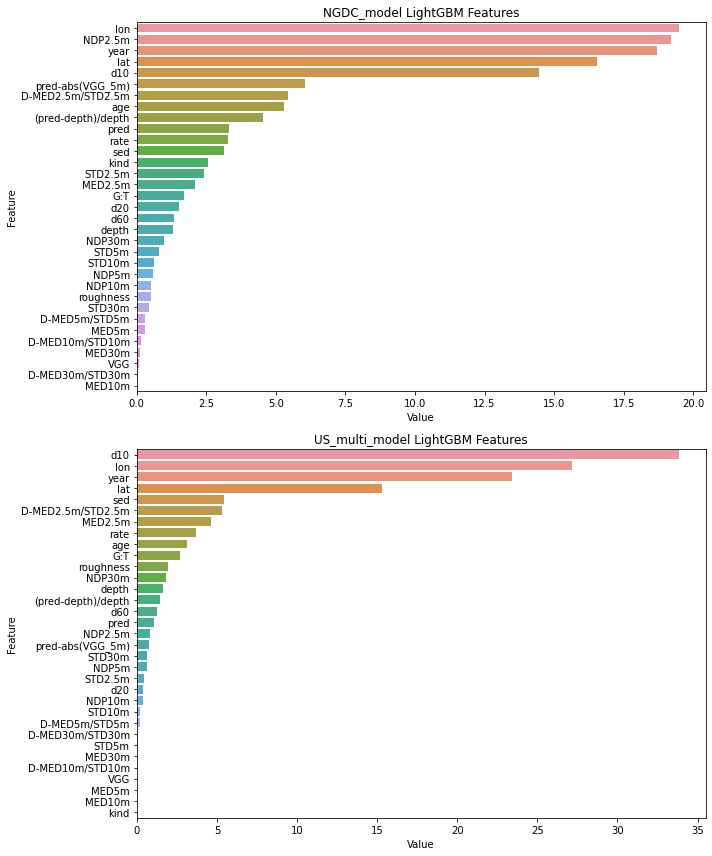

In [4]:
all_feature_imp = []
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='gain'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)
    feature_imp["agency"] = model_name.rsplit('_', 1)[0]
    all_feature_imp.append(feature_imp)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()

## Train-test split models
How do these models differ from the train-test split models?...

In [5]:
base_path = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/train-test-split"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

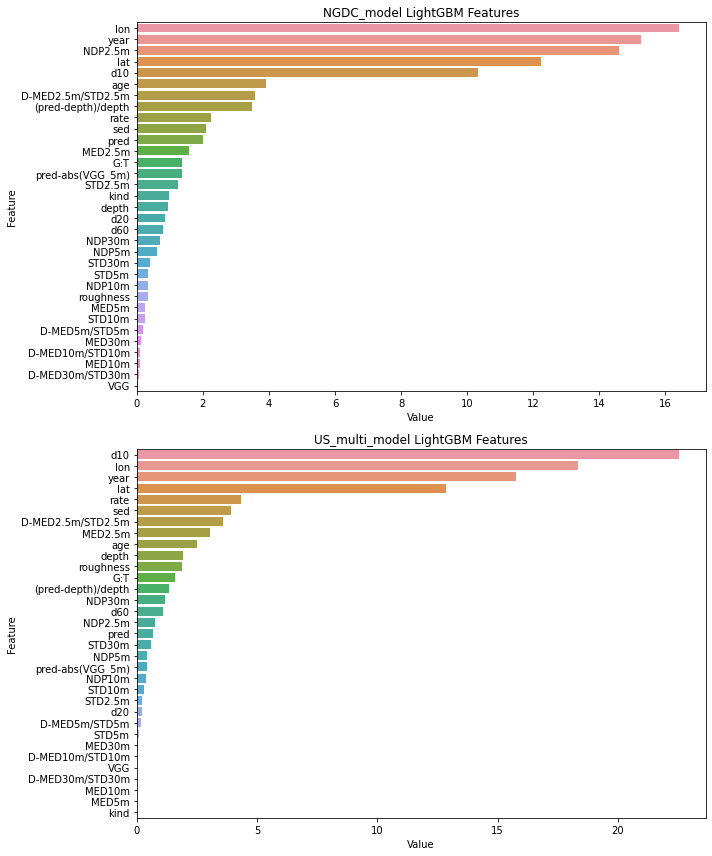

In [6]:
all_feature_imp = []
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='gain'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)
    feature_imp["agency"] = model_name.rsplit('_', 1)[0]
    all_feature_imp.append(feature_imp)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()

The answer is not a lot, which we would expect, since the only difference is the split model uses a subset of training data. 

## Remove features
We see that some of the most important features between the two models are lon, lat, and year. Those features might be biasing our model. What happens when we remove them?

In [13]:
features = '''02 depth
03 pred
04 (pred-depth)/depth
05 d10
06 d20
07 d60
08 age
09 VGG
10 rate
11 sed
12 roughness
13 G:T
14 NDP2.5m
15 NDP5m
16 NDP10m
17 NDP30m
18 STD2.5m
19 STD5m
20 STD10m
21 STD30m
22 MED2.5m
23 MED5m
24 MED10m
25 MED30m
26 D-MED2.5m/STD2.5m
27 D-MED5m/STD5m
28 D-MED10m/STD10m
29 D-MED30m/STD30m
31 kind
32 pred-abs(VGG_5m)'''.split('\n')
features = [s.split()[1] for s in features]

In [14]:
base_path = "/swot2/features/MODEL_RUNS/02_NO_LAT_LON_YR/train-test-split"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

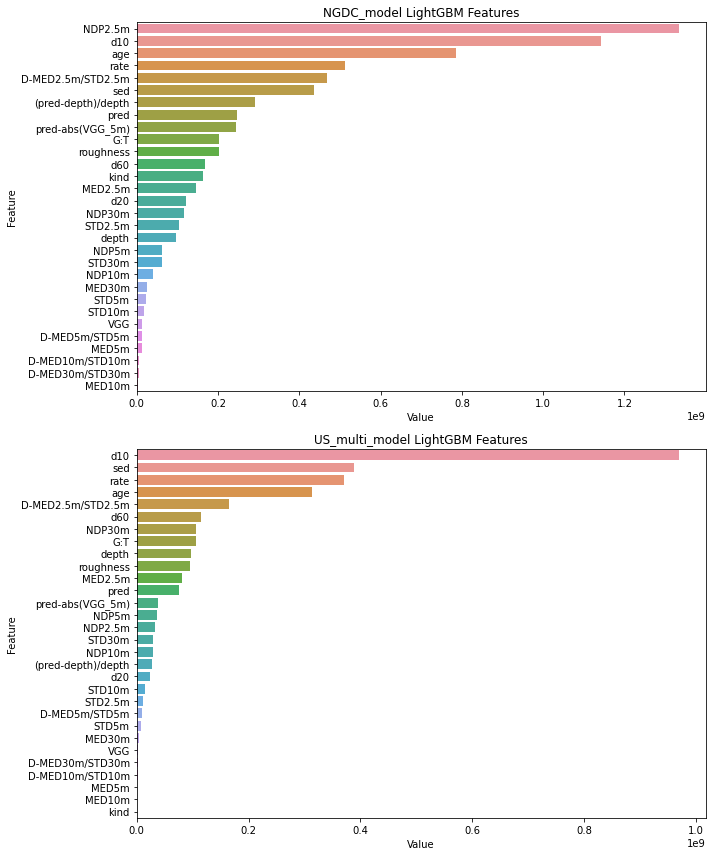

In [15]:
all_feature_imp = []
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='gain'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)
    feature_imp["agency"] = model_name.rsplit('_', 1)[0]
    all_feature_imp.append(feature_imp)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()

Note that these models are from the train-test split. The gain values seem unreasonably high, and I'm not sure what's up with that.

## Feature list, significantly reduced

I tried removing all but a few features, let's see how that worked.

In [16]:
features = '''01 depth
02 pred
03 (pred-depth)/depth
04 d10
05 NDP2.5m
06 D-MED2.5m/STD2.5m'''.split('\n')
features = [s.split()[1] for s in features]

base_path = "/swot2/features/MODEL_RUNS/01_FEWEST_FEATURES/BASE_model"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

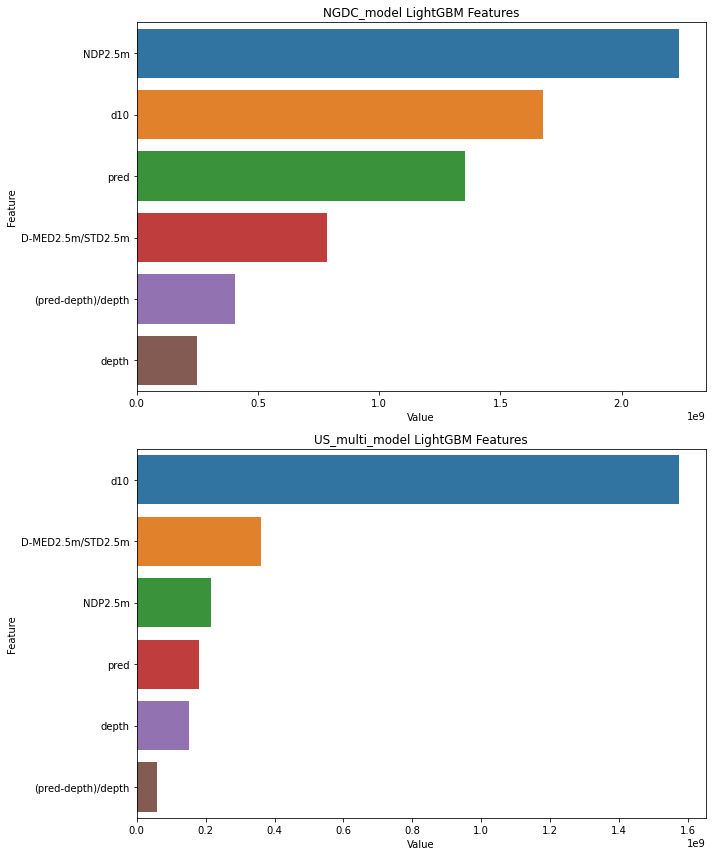

In [17]:
all_feature_imp = []
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='gain'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)
    feature_imp["agency"] = model_name.rsplit('_', 1)[0]
    all_feature_imp.append(feature_imp)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()

### My hypothesis
Many of the features we're using here are not helping because they are not correlated with good and bad data. We are looking mostly at independent features from independent grids when we *should* be looking at how the multibeam data relate to themselves. For instance abs(pred-depth)/depth should be a useful feature, but it alone might not suggest the ping is bad but rather our predicted depth is bad. It depends on whether a single ping has a large difference (probably bad), or if there is a spatial grouping of pings with that large difference (probably good). Also, echosounder metadata is likely just as relevant, and we can't make use of it...